In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housePrice.csv")
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [3]:
df.sort_values(by='Area').head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
807,"1,000",2,True,True,False,Damavand,7.000000e+09,233333.33
709,"16,160,000,000",3,True,True,True,Pasdaran,1.616000e+10,538666.67
2802,"2,550,000,000",2,True,True,True,Central Janatabad,2.550000e+09,85000.00
570,"3,310,000,000",2,True,True,True,Ostad Moein,3.310000e+09,110333.33
2171,"3,600",2,False,False,False,Shahryar,9.720000e+09,324000.00
1604,"8,400,000,000",2,True,True,True,Gheitarieh,8.700000e+09,290000.00
934,100,2,True,True,True,West Ferdows Boulevard,3.450000e+09,115000.00
1080,100,2,False,True,False,Tehransar,2.000000e+09,66666.67
1595,100,2,False,True,False,Tehransar,2.000000e+09,66666.67
1597,100,2,True,True,True,Gheitarieh,8.200000e+09,273333.33


In [4]:
df.sort_values(by='Address').tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3315,120,2,True,True,True,NaN,1.440000e+09,48000.00
3318,103,2,True,True,True,NaN,1.150000e+09,38333.33
3355,135,3,True,True,True,NaN,1.500000e+09,50000.00
3401,78,2,True,False,True,NaN,7.400000e+08,24666.67
3434,87,2,True,True,True,NaN,6.800000e+08,22666.67


#### drop dataset with invalid values

In [6]:
df = df.drop([570,709,1604,2802])
df = df.drop(df[pd.isnull(df['Address'])].index, inplace = False)
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

### convert Area from object to float and bolean data to int

In [8]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df = df.drop(df[pd.isnull(df['Area'])].index, inplace = False)
df["Parking"] = df["Parking"].astype(int)
df["Warehouse"] = df["Warehouse"].astype(int)
df["Elevator"] = df["Elevator"].astype(int)
#df['Address'] = df['Address'].astype('string')
df.dtypes

Area          float64
Room            int64
Parking         int32
Warehouse       int32
Elevator        int32
Address        object
Price         float64
Price(USD)    float64
dtype: object

Text(0, 0.5, 'price')

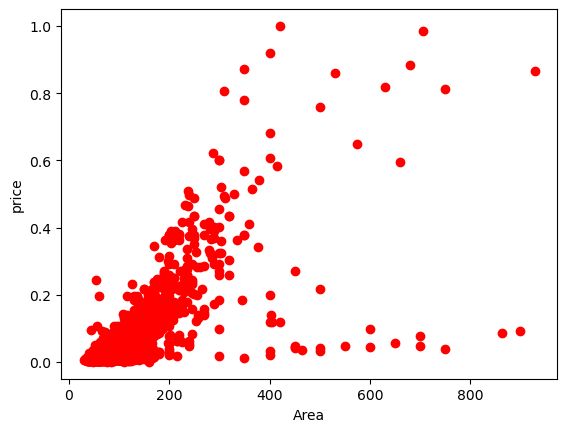

In [9]:
x = np.asanyarray(df['Area'])
y = np.asanyarray(df['Price(USD)']) / max(df['Price(USD)'])
plt.scatter(x,y,color="red")
plt.xlabel('Area')
plt.ylabel('price')

In [45]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [47]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator']])
train_y = np.asanyarray(train[['Price(USD)']])
regr.fit(train_x,train_y)
print (regr.coef_)
print (regr.intercept_)

[[ 2398.00411024 48655.92853806 -7564.30173314 37846.25930549
  41835.90434008]]
[-239810.36016177]


In [49]:
train_y_= regr.predict(test[['Area','Room','Parking','Warehouse','Elevator']])
test_x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator']])
test_y = np.asanyarray(test[['Price(USD)']])

print("Mean absolute error: %.2f" % np.mean(np.absolute((train_y_ - test_y))))
print("Residual sum of squares: %.2f" % np.mean((train_y_ - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))

Mean absolute error: 104506.61
Residual sum of squares: 45273623508.61
Variance score: 0.49


C:\Users\moreza\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Replace space in Address

In [14]:
df['Address'] = df['Address'].str.replace(" ", "")
df['Address']

0                 Shahran
1                 Shahran
2                  Pardis
3            ShahrakeQods
4           ShahrakeGharb
              ...        
3474    SouthernJanatabad
3475             Niavaran
3476               Parand
3477               Dorous
3478               Parand
Name: Address, Length: 3450, dtype: object

<Axes: >

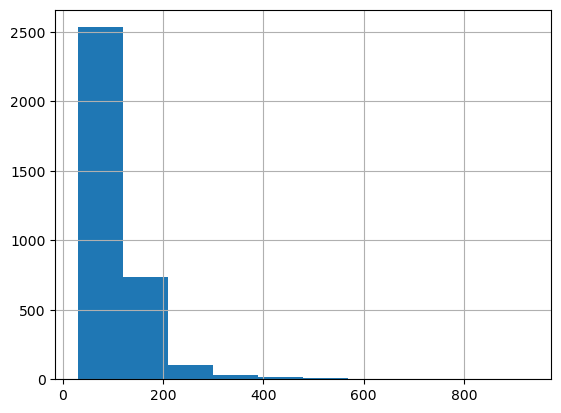

In [15]:
df['Area'].hist()

In [16]:
cdf = df
cdf = cdf.drop(cdf[cdf['Area'] >= 250].index, inplace = False)
cdf.sort_values(by='Area')

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3211,30.0,0,0,1,0,OstadMoein,5.000000e+08,16666.67
2324,32.0,1,0,1,1,Eskandari,9.400000e+08,31333.33
2321,32.0,1,0,1,0,Hashemi,6.100000e+08,20333.33
2783,33.0,1,0,1,0,Beryanak,5.600000e+08,18666.67
2307,35.0,1,0,1,0,Salsabil,6.600000e+08,22000.00
...,...,...,...,...,...,...,...,...
628,245.0,3,1,1,1,Farmanieh,2.205000e+10,735000.00
160,245.0,3,1,1,1,Farmanieh,2.695000e+10,898333.33
1650,245.0,3,1,1,1,Niavaran,2.156000e+10,718666.67
459,245.0,3,1,1,1,Aqdasieh,3.650000e+10,1216666.67


Text(0, 0.5, 'price')

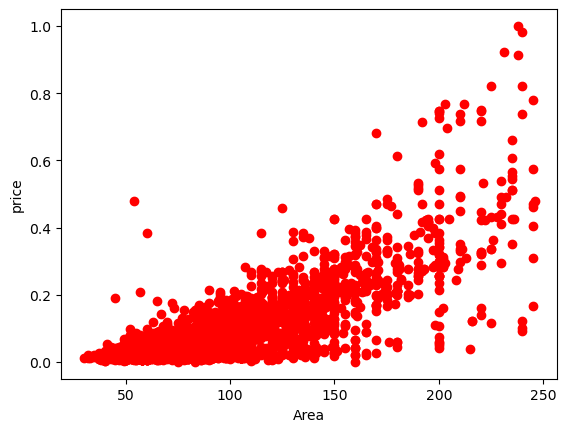

In [17]:
x = np.asanyarray(cdf['Area'])
y = np.asanyarray(cdf['Price(USD)'] / max(cdf['Price(USD)']))
plt.scatter(x,y,color="red")
plt.xlabel('Area')
plt.ylabel('price')

In [18]:
msk = np.random.rand(len(cdf)) < 0.8
train_c = cdf[msk]
test_c = cdf[~msk]

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_c[['Area','Room','Parking','Warehouse','Elevator']])
train_y = np.asanyarray(train_c[['Price(USD)']])
regr.fit(train_x,train_y)
print (regr.coef_)
print (regr.intercept_)

[[  3918.3618401  -49558.58209202   8487.50621058  16412.52110935
    3569.72463942]]
[-156103.21184749]


In [20]:
train_y_= regr.predict(test_c[['Area','Room','Parking','Warehouse','Elevator']])
test_x = np.asanyarray(test_c[['Area','Room','Parking','Warehouse','Elevator']])
test_y = np.asanyarray(test_c[['Price(USD)']])

print("Mean absolute error: %.2f" % np.mean(np.absolute((train_y_ - test_y))))
print("Residual sum of squares: %.2f" % np.mean((train_y_ - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))

Mean absolute error: 66276.36
Residual sum of squares: 10338786231.01
Variance score: 0.58


C:\Users\moreza\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train_c[['Area']])
train_y = np.asanyarray(train_c[['Price(USD)']])

test_x = np.asanyarray(test_c[['Area']])
test_y = np.asanyarray(test_c[['Price(USD)']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 1.2300e+02, 1.5129e+04],
       ...,
       [1.0000e+00, 7.5000e+01, 5.6250e+03],
       [1.0000e+00, 1.0500e+02, 1.1025e+04],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [22]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[   0.         -756.30921543   16.65250429]]
Intercept:  [38183.82629783]


In [23]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 59936.71
Residual sum of squares (MSE): 8722435776.61
R2-score: 0.65
